# 01. Exploratory Data Analysis(EDA):
## 1-1 Analysis of the feature

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- The Age, Cabin and Embarked have null values -> to fix them

### How many Survived?

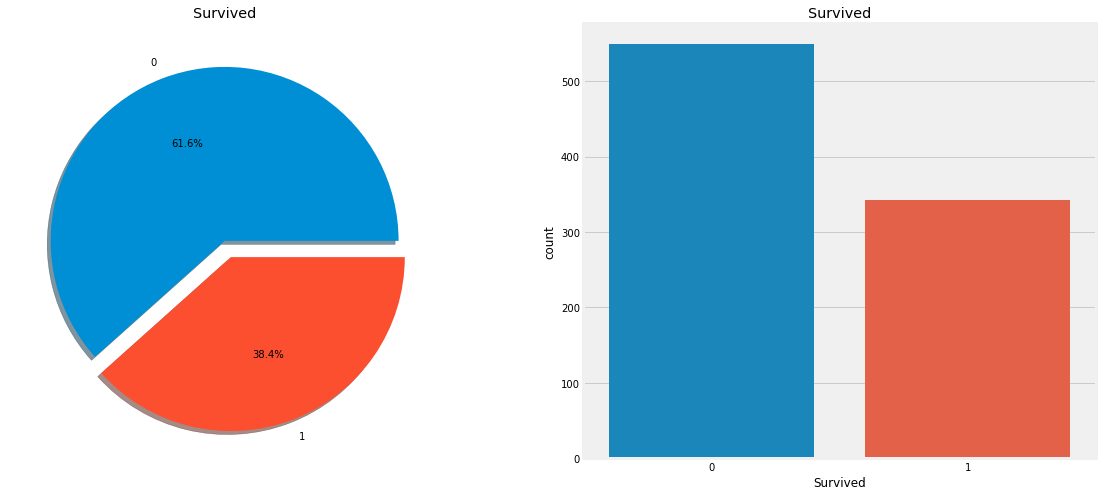

In [7]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- 훈련 세트에 있던 891명의 승객 중 약 350명만이 생존
- 즉, 전체 훈련 세트의 38.4%만이 충돌에서 생존
- 우리는 데이터에서 더 나은 통찰력을 얻고 승객의 어떤 범주가 생존했고 누가 그렇지 않았는지 확인하기 위해 더 파헤쳐야 한다.

### Types of Features
#### Categorical Features :
범주형 변수는 두 개 이상의 범주가 있고 해당 기능의 각 값이 범주로 분류될 수 있는 변수이다. 예를 들어 성별은 두 범주(남성 및 여성)가 있는 범주형 변수이다. 이제 우리는 그러한 변수를 정렬하거나 순서를 지정할 수 없고, 명목 변수라고도 한다.  
**Categorical Features in the dataset : Sex, Embarked**  

#### Ordinal Features :
서수형 변수는 범주형 값과 유사하지만 이들 사이의 차이점은 값 간에 상대적인 순서 또는 정렬을 가질 수 있다는 것이다. 예를 들어, 값이 Tall, Medium, Short인 Height와 같은 기능이 있는 경우 Height는 순서 변수이다. 여기에서 우리는 변수에서 상대 정렬을 가질 수 있다.  
**Ordinal Features in the dataset : PClass**

#### Continous Feature :
두 지점 사이 또는 features column의 최소값 또는 최대값 사이의 값을 가질 수 있는 경우, feature가 연속적이라고 한다.  
**Continous Features in the dataset : Age**

## 1-2 Finding any relations or trends considering multiple features

### Analysing The Feature
#### Sex -> Categorical Feature

In [8]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

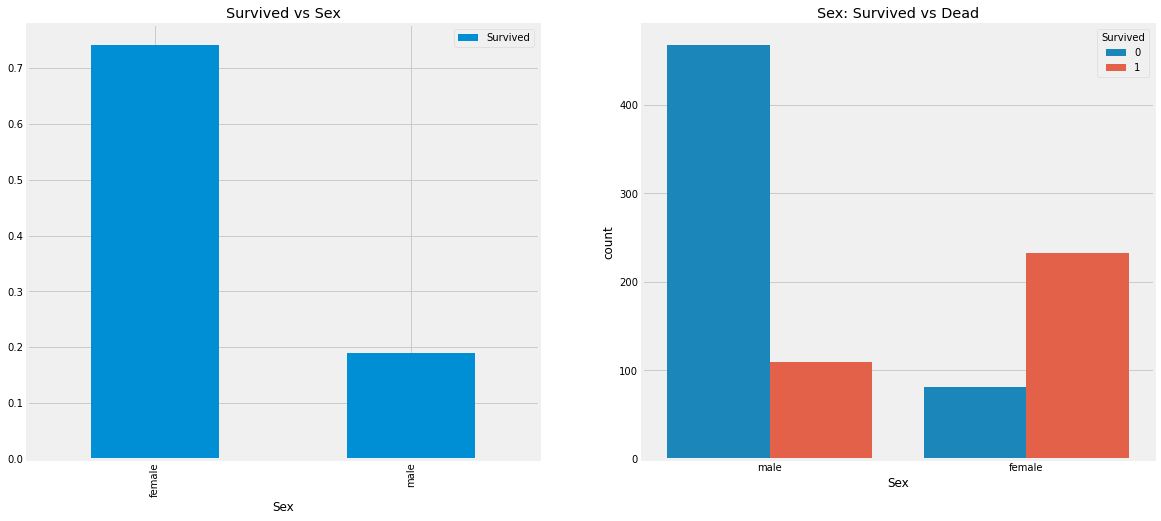

In [9]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 배에 탄 남자의 수는 여자의 수보다 훨씬 많다. 
- 여전히 생존한 여성의 수는 생존한 남성의 수의 거의 두 배이다. 
- 배에 탄 여성의 생존율은 약 75%인 반면 남성의 생존율은 약 18-19%이다.

#### Pclass -> Ordinal Feature

In [10]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


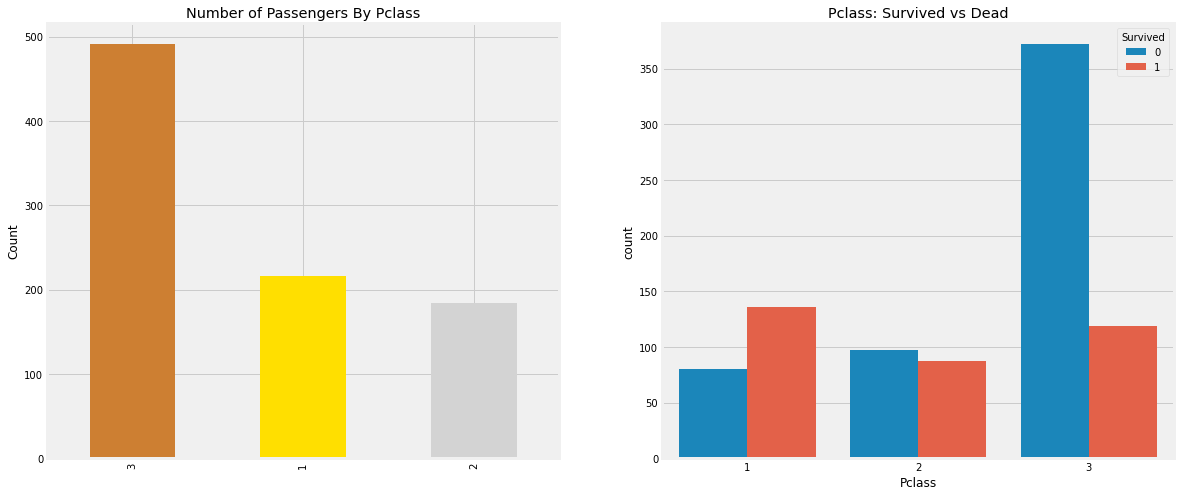

In [11]:
f,ax= plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

- Pclass 1의 승객이 구조하는 동안 매우 높은 우선 순위를 받았다는 것을 분명히 알 수 있다.
- Pclass 3의 승객 수가 훨씬 더 많았음에도 불구하고 생존율은 약 25%로 매우 낮다.
- Pclass 1의 경우 생존률은 약 63%인 반면 Pclass2의 경우 약 48%이다.

#### 성별과 Pclass간의 생존률 관계 확인

In [12]:
pd.crosstab([data.Sex, data.Survived],data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

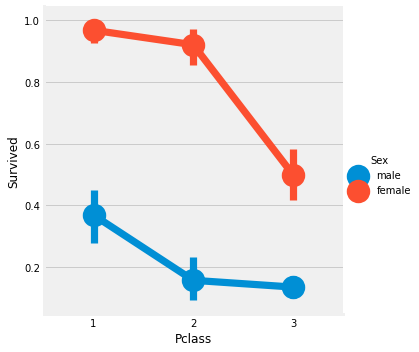

In [14]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',kind='point',data=data)
plt.show()

- CrossTab과 catPlot을 보면 Pclass1의 여성 94명 중 3명만이 사망했기 때문에 Pclass1 여성의 생존율이 약 95-96%라는 것을 쉽게 추론할 수 있다.
- Pclass와 관계없이 구조 시 여성이 우선권을 가짐이 분명하다. Pclass1의 남성조차도 생존율이 매우 낮다.
- Pclass도 중요한 기능인 것 같다.

#### Age -> Continous Feature

In [15]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


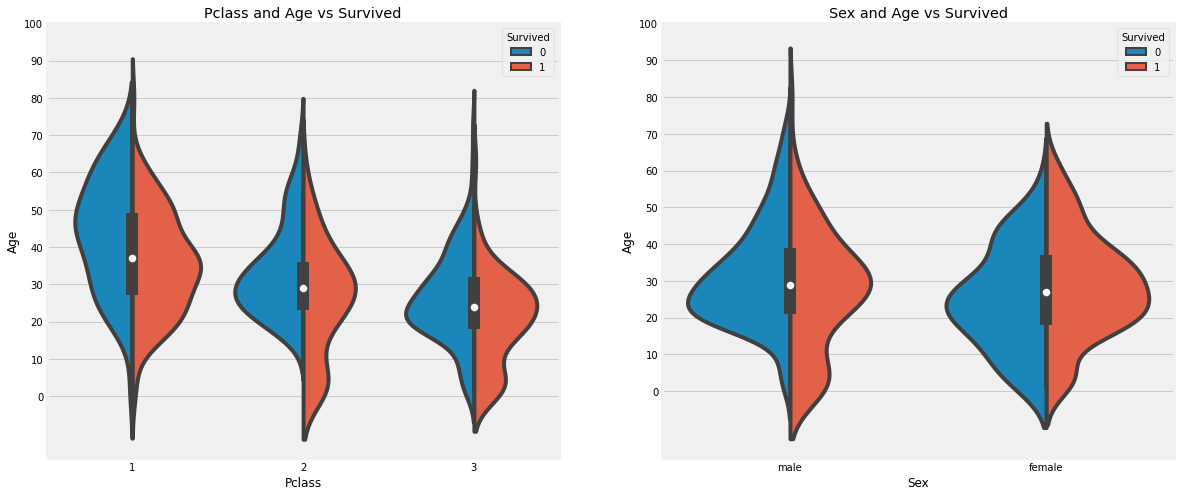

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age",hue="Survived",data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age",hue="Survived",data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

1. P등급에 따라 자녀의 수가 증가하고 10세 미만 승객(즉, 어린이)의 생존율은 P등급에 관계없이 양호해 보인다.  
2.Pclass1의 20-50세 승객의 생존 가능성은 높고 여성에게는 훨씬 더 좋다.  
3.남성의 경우 연령이 증가함에 따라 생존 확률이 감소한다.

- 앞에서 본 것처럼 나이 기능에는 177개의 null 값이 있다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 연령을 할당할 수 있다.
- 하지만 문제는 다양한 연령대의 사람들이 많았다는 것이다. 29세인 평균 연령으로 4세 아이를 할당할 수 없다. 승객이 거짓말을 하는 연령대를 알 수 있는 방법이 있을까??

- 이름 기능을 확인할 수 있다. 기능을 살펴보면 이름에 Mr 또는 Mrs와 같은 인사말이 있음을 알 수 있다. 따라서 각 그룹에 Mr 및 Mrs의 평균 값을 할당할 수 있다.

#### What's In A Name?? -> Feature : p

In [19]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') # lets extract the Salutations

In [20]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') 
# Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [21]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [22]:
data.groupby('Initial')['Age'].mean()
# lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [23]:
## Assigning the NaN values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [24]:
data.Age.isnull().any()
# So no null values left finally

False

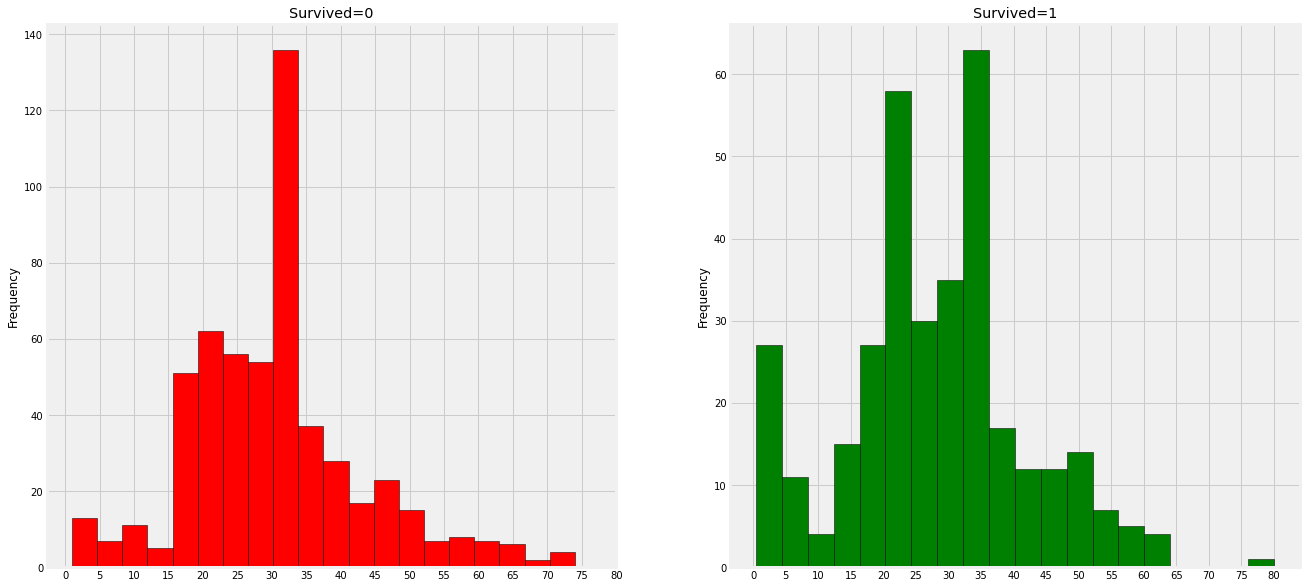

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

1.많은 수의 유아(5세 미만)가 구해졌다(여성과 아동 우선 정책)  
2.가장 나이 많은 승객이 구해졌다(80세)  
3.최대 사망자 수는 30-40세였다

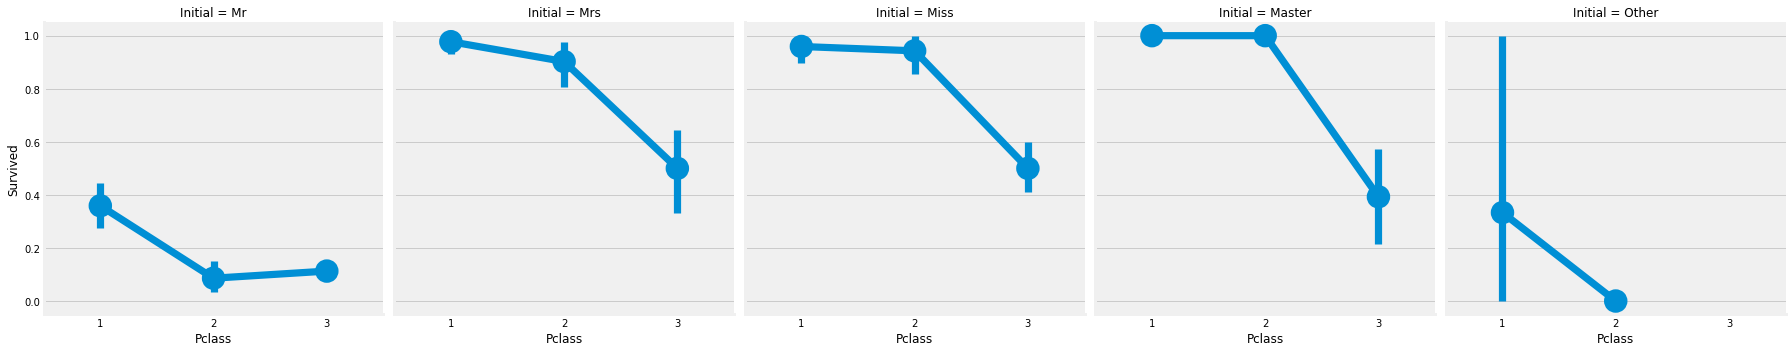

In [27]:
sns.catplot(x='Pclass',y='Survived',col='Initial',kind='point',data=data)
plt.show()

- 여성과 아동 우선 정책은 계층에 관계없이 적용된다.

#### Embarked -> Categorical Value

In [28]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived],margins=True).style.background_gradient(cmap='summer_r')

#### Chances for Survival by Port of Embarkation

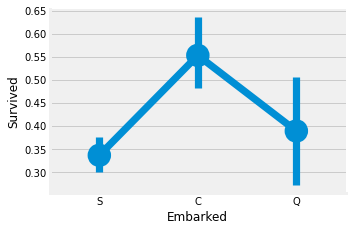

In [29]:
sns.catplot(x='Embarked',y='Survived',kind='point',data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- Port C의 생존률이 대략 0.55로 가장 높다.
- 반면에 Port S가 가장 낮다

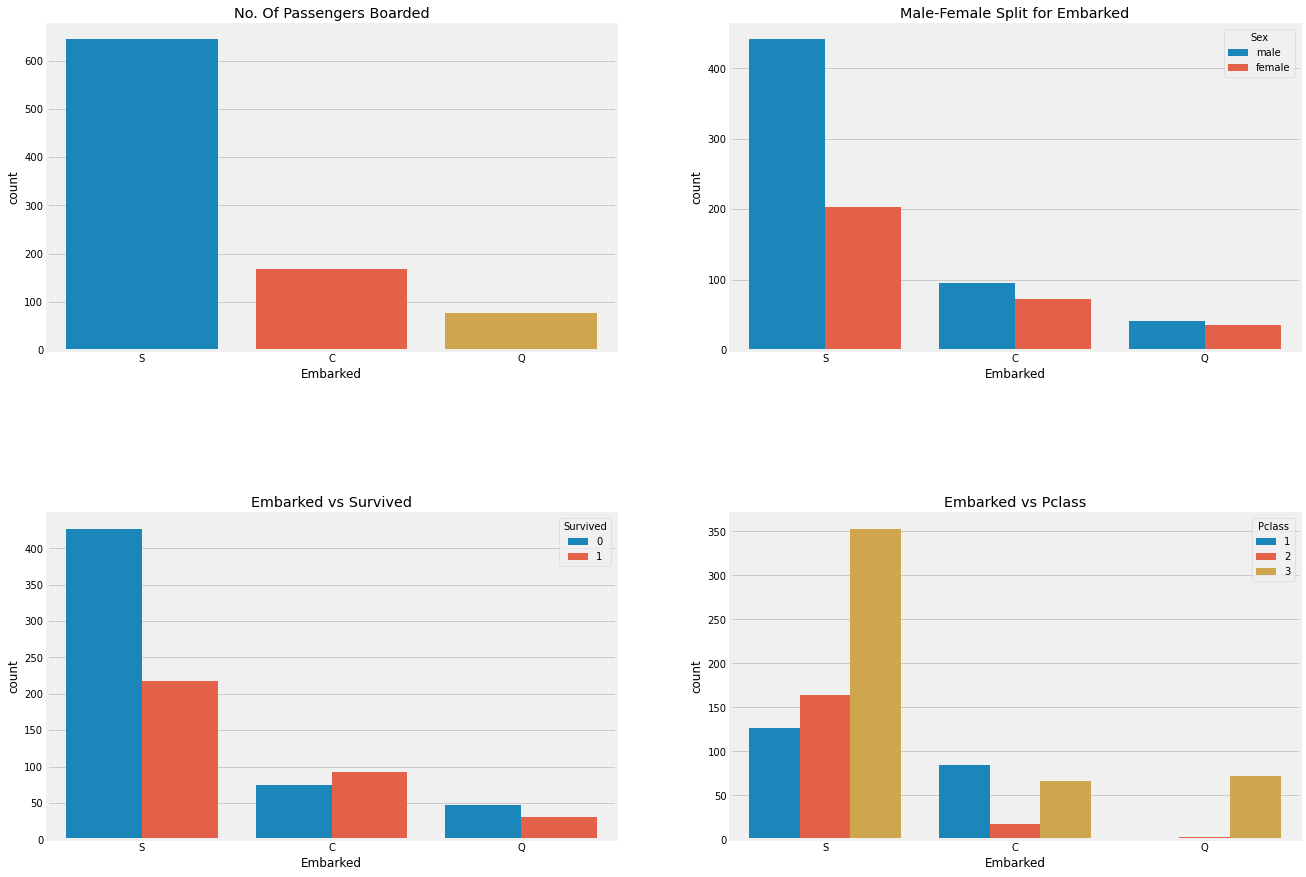

In [30]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1. 최대 승객은 S에서 탑승하며 대다수는 Pclass3이다.  
2. C에서 온 승객들은 상당수가 살아남았기 때문에 운이 좋아 보인다. 그 이유는 아마도 모든 Pclass1 및 Pclass2 승객의 구조 때문일 것이다.  
3. Embark S는 대부분의 부자들이 탑승한 항구를 바라보고 있다. 여전히 여기에서 생존 가능성은 낮다. 약 81%의 Pclass3 승객이 생존하지 못했기 때문이다.  
4. Port Q는 승객의 거의 95%가 Pclass3 승객이었다.

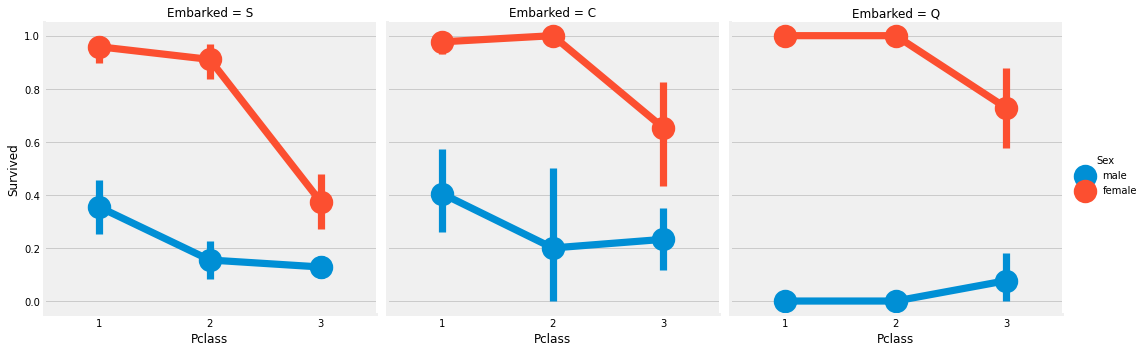

In [31]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',kind='point',col='Embarked',data=data)
plt.show()

1. Pclass와 상관없이 Pclass1과 Pclass2의 경우 여성의 생존 확률은 거의 1이다.  
2. Port S는 남성과 여성 모두 생존율이 매우 낮기 때문에 Pclass3 Passenegers에게 매우 불행해 보인다.(돈 문제)  
3. Port Q는 거의 모든 것이 Pclass3에서 왔기 때문에 남성에게 가장 좋지 않은 것으로 보인다.

#### Filling Embarked NaN
- Port S에서 가장 많은 탑승객이 탑승했기 때문에 NaN값을 S로 대체

In [32]:
data['Embarked'].fillna('S',inplace=True)

In [33]:
data.Embarked.isnull().any()
# Finally No NaN values

False

#### SibSip -> Discrete Feature
- This feature represents whether a person is alone or with his family members.
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife

In [34]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


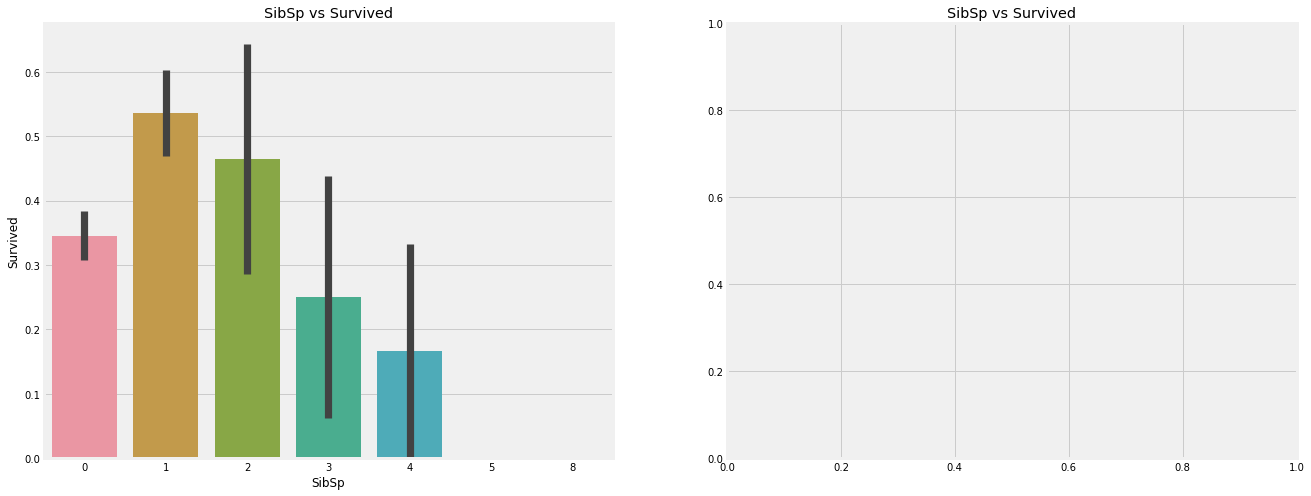

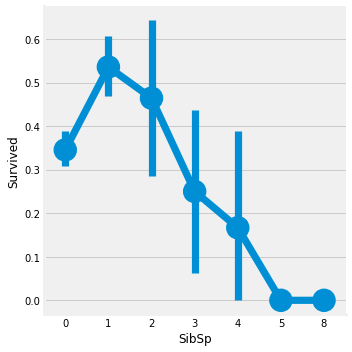

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.catplot(x='SibSp',y='Survived',kind='point',data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
#plt.close(2)
plt.show()

In [39]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- Barplot과 catplot은 승객이 형제자매 없이 혼자 탑승하는 경우 생존율이 34.5%임을 보여준다.
- 형제 수가 증가하면 그래프가 대략적으로 감소한다. 이것은 의미가 있다. 즉, 가족이 타고 있다면 나 자신을 먼저 구하는 대신 그들을 구하려고 노력할 것이다. 놀랍게도 5~8인 가족의 생존율은 0%다. 그 이유는 Pclass??
- 그 이유는 P클래스 때문이다. 크로스탭은 SibSp>3인 사람이 모두 Pclass3에 있음을 보여준다.
- Pclass3(>3)의 모든 대가족이 사망하는 것이 임박했다.

#### Parch

In [40]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


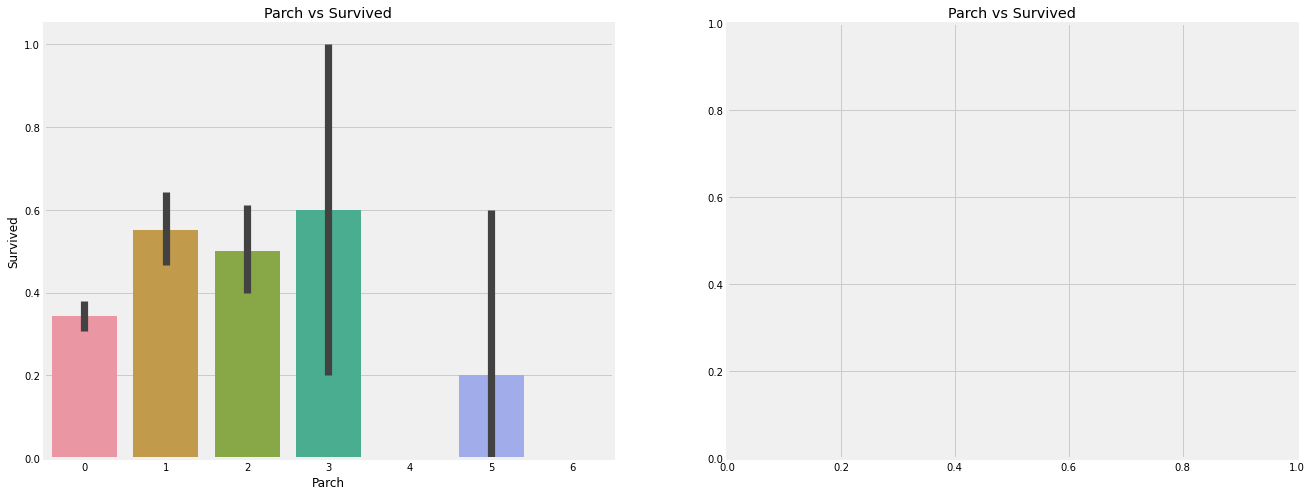

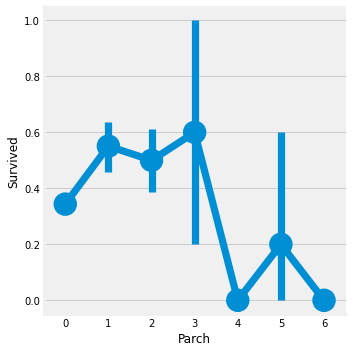

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.catplot(x='Parch',y='Survived',kind='point',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
#plt.close(2)
plt.show()

- 가족과 함께 탑승한 승객은 생존 가능성이 더 높다. 그러나 숫자가 증가함에 따라 감소한다.
- 배에 가족이 1-3명 있는 사람에게는 생존 가능성이 높다. 혼자 있는 것도 치명적이며 배에 가족이 4명보다 많은 사람이 있을 때 생존 가능성이 줄어든다.

#### Fare -> Continous Feature

In [43]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())


Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


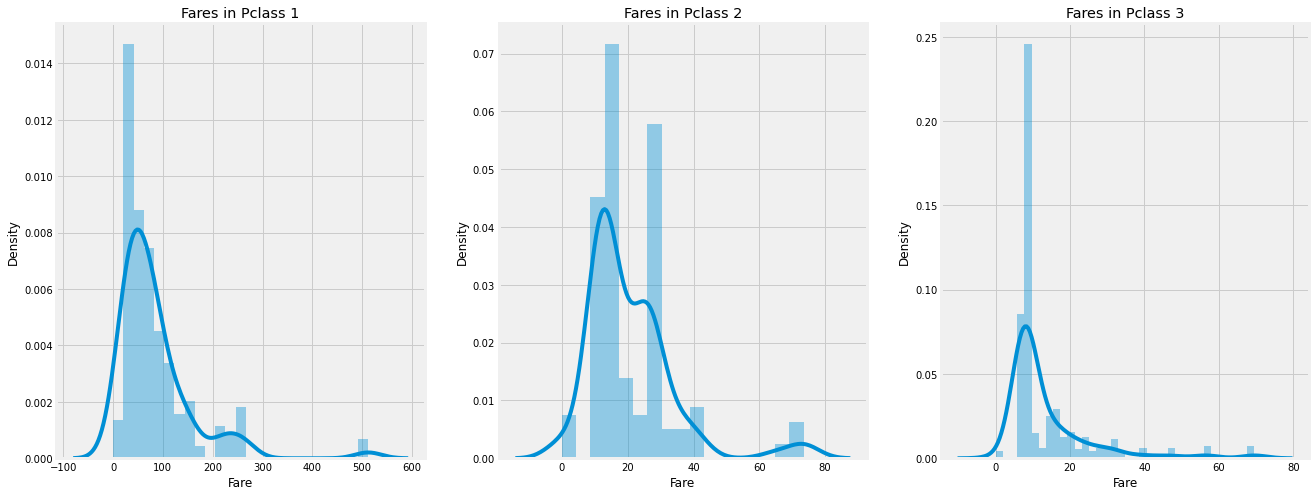

In [44]:
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

- Pclass1의 승객 요금에는 큰 분포가 있는 것으로 보이며 이 분포는 표준이 낮아짐에 따라 계속 감소한다. 이 역시 연속적이므로 구간화하여 불연속 값으로 변환할 수 있다.

#### Observations in Nutshell for all features :
**Sex** : 남성과 비교할 때 여성의 생존률이 더 높다.  
**Pclass** : Pclass1 탑승객들이 생존률이 더 높다는 뚜렷한 트랜드를 볼 수 있다. Pclass3의 생존률은 매우 낮다. Pclass1의 여성 승객의 생존률은 거의 1에 가까우며 Pclass2의 여성 승객도 생존률이 높은 것을 볼 수 있다.  
**Age** : 5-10살 사이의 탑승객의 생존률이 높은것을 볼 수 있다. 15-35살 사이의 탑승객은 많이 죽었다.  
**Embarked** : 대부분의 Pclass1 승객이 S에서 탑승했음에도 불구하고 C에서 생존 가능성이 더 높아 보인다. Q에서 승객은 모두 Pclass3이다.  
**Parch+SibSp** : 1-2명의 형제자매, 배우자 또는 1-3명의 부모가 있는 경우, 혼자 여행하거나 대가족이 함께 여행하는 것보다 생존 확률이 더 높다.  


#### Correlation Between The Features

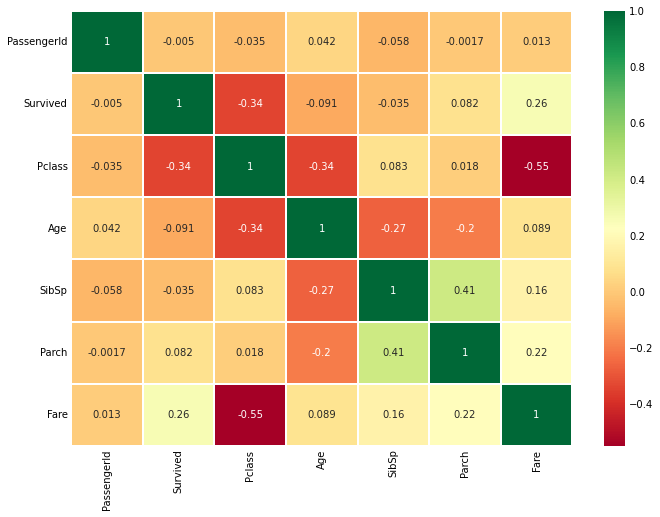

In [45]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn',linewidths=0.2) # data.corr() -> correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

**Heatmap**
- 데이터가 숫자인것만 비교 가능
- POSITIVE CORRELATION : feature A의 증가가 feature B의 증가로 이어진다면 양의 상관 관계가 있다. 값 1은 완벽한 양의 상관관계를 의미한다.
- NEGATIVE CORRELATION : feature A의 증가가 feature B의 감소로 이어진다면 음의 상관 관계가 있다. 값 -1은 완벽한 음의 상관관계를 의미한다.
  
두 feature가 고도로 또는 완벽하게 상관되어 있으므로 하나의 증가가 다른 하나의 증가로 이어진다고 가정해 보자. 이는 두 feature가 매우 유사한 정보를 포함하고 있으며 정보의 차이가 거의 또는 전혀 없음을 의미한다. 둘 다 거의 동일한 정보를 포함하므로 이를 MultiColinearity라고 한다.  

둘 중 하나가 중복되므로 둘 다 사용해야 한다고 생각하는가? 모델을 만들거나 교육하는 동안 교육 시간과 많은 이점을 줄이기 때문에 중복 기능을 제거해야 한다.  

이제 위의 히트맵에서 feature가 그다지 상관관계가 없음을 알 수 있다. 가장 높은 상관관계는 SibSp와 Parch, 즉 0.41 사이이다. 따라서 모든 기능을 계속 사용할 수 있다.

# 02. Feature Engineering and Data Cleaning:
- 기능이 있는 데이터 세트가 제공될 때마다 모든 기능이 중요할 필요는 없다. 제거해야 하는 중복 기능이 많이 있을 수 있다. 또한 다른 기능을 관찰하거나 정보를 추출하여 새로운 기능을 얻거나 추가할 수 있다.
- 이름 feature를 사용하여 initial feature를 가져오는 것이 그 예이다. 새로운 기능을 얻고 몇 가지를 제거할 수 있는지 보자. 또한 기존 관련 기능을 Predictive Modeling에 적합한 형태로 변환한다.

## 2-1 Adding any few features
## 2-2 Removing redundant features
## 2-3 Converting features into suitable form for modeling
### Age_band
**Problem With Age Feature** :
Age는 연속적인 feature이며 기계 학습 모델의 연속 변수에 문제가 있다.
- 구간화 또는 정규화를 통해 이러한 연속 값을 범주 값으로 변환해야 한다. 
- 구간화를 사용한다. 즉, 연령 범위를 단일 구간으로 그룹화하거나 단일 값을 할당한다.

In [46]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16) & (data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32) & (data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48) & (data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [47]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')
# checking the number of passengers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


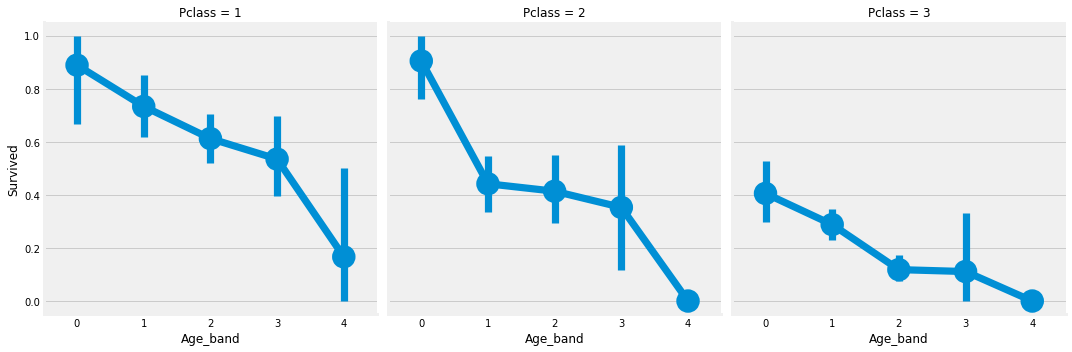

In [48]:
sns.catplot(x='Age_band',y='Survived',kind='point',data=data,col='Pclass')
plt.show()

the survival rate decreases as the age increases irrespective of the Pclass. 

### Family_Size and Alone

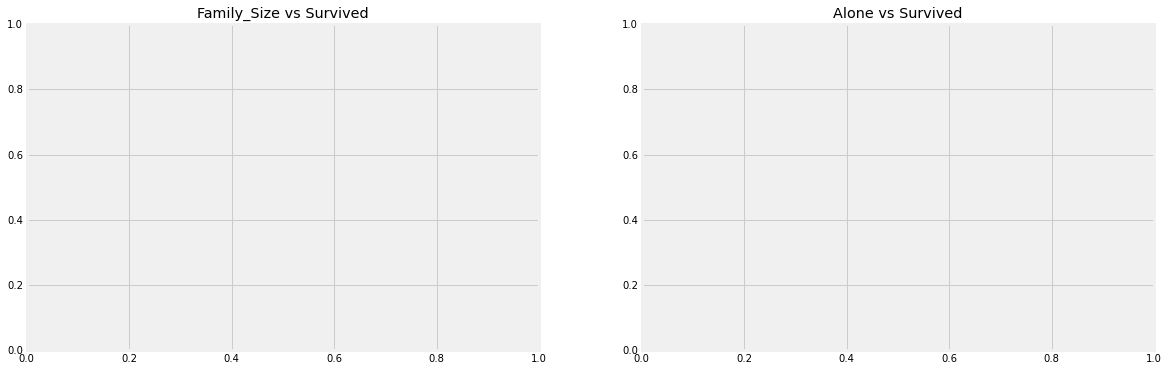

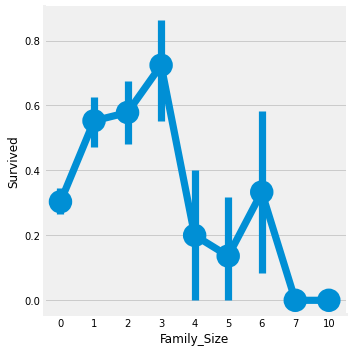

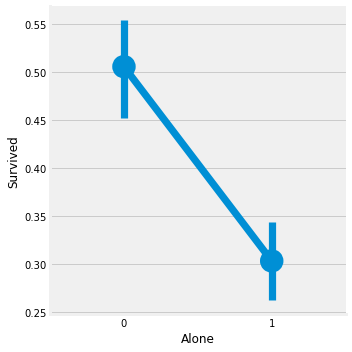

In [52]:
data['Family_Size']=0
data['Family_Size'] = data['Parch']+data['SibSp'] # family size
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone']=1 # Alone

f,ax = plt.subplots(1,2,figsize=(18,6))
sns.catplot(x='Family_Size',y='Survived',kind='point',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.catplot(x='Alone',y='Survived',kind='point',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')

#plt.close(2)
#plt.close(3)
plt.show()

Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

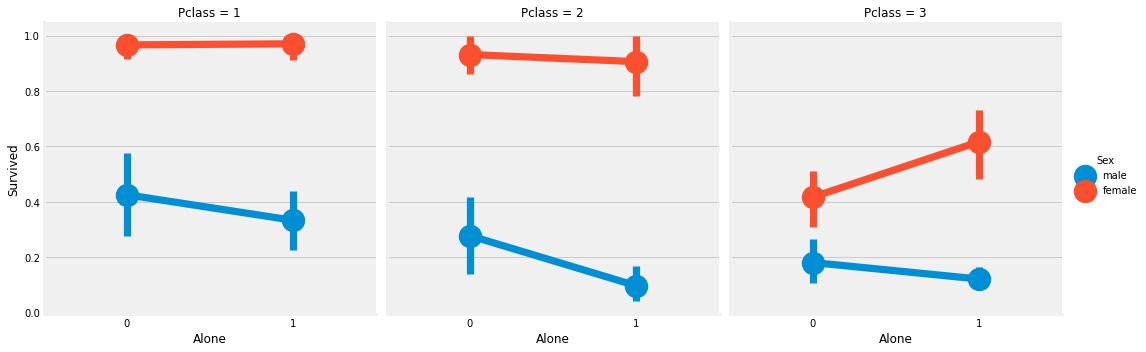

In [53]:
sns.catplot(x='Alone',y='Survived',data=data,kind='point',hue='Sex',col='Pclass')
plt.show()

가족이 있는 여성보다 혼자 있는 여성의 생존 확률이 높은 Pclass3를 제외하고는 성별이나 Pclass에 상관없이 혼자 있는 것이 안좋다는 것을 알 수 있다.

### Fare_Range
- Fare도 연속 feature이므로 서수 값으로 변환해야 한다.
- pandas.qcut을 사용해 변환
- qcut : 구간 수에 따라 값을 분할하거나 정렬하는 것이다. 따라서 5개의 구간을 통과하면 값을 5개의 별도 빈 또는 값 범위에 동일한 간격으로 배열한다.

In [54]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- the fare_range increases, the chances of survival increases.
- Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [55]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.9, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.9)&(data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513), 'Fare_cat'] = 3

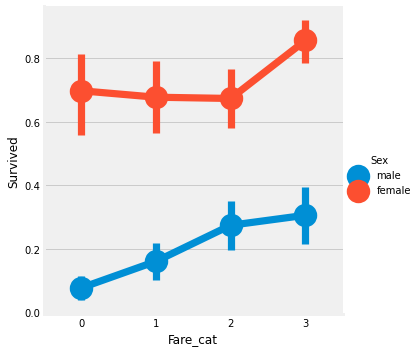

In [56]:
sns.catplot(x='Fare_cat',y='Survived',data=data, hue='Sex',kind='point')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

### Converting String Values into Numeric
since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [57]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Dropping UnNeeded Features
**Name**--> We don't need name feature as it cannot be converted into any categorical value.

**Age**--> We have the Age_band feature, so no need of this.

**Ticket**--> It is any random string that cannot be categorised.

**Fare**--> We have the Fare_cat feature, so unneeded

**Cabin**--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

**Fare_Range**--> We have the fare_cat feature.

**PassengerId**--> Cannot be categorised.

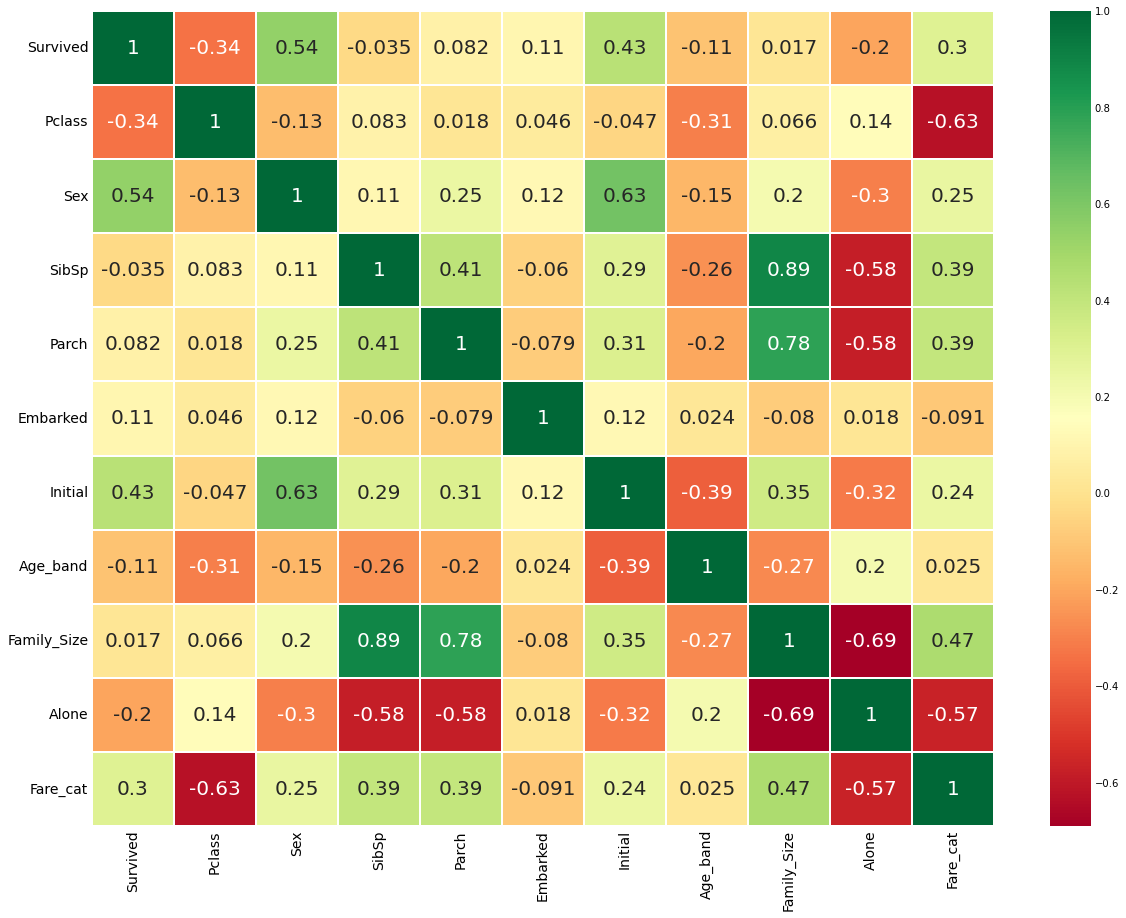

In [58]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

we can see some positively related features. Some of them being SibSp andd Family_Size and Parch and Family_Size and some negative ones like Alone and Family_Size.

# 03. Predictive Modeling:
## 3-1 Running Basic Algorithms
1.Logistic Regression  
2.Support Vector Machines(Linear and radial)  
3.Random Forest  
4.K-Nearest Neighbours  
5.Naive Bayes  
6.Decision Tree  
7.Logistic Regression  

In [59]:
# importing all the required ML packages
# logistic regression
from sklearn.linear_model import LogisticRegression 
# support vector Machine
from sklearn import svm
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Naive bayes
from sklearn.naive_bayes import GaussianNB
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# training and testing data split
from sklearn.model_selection import train_test_split
# accuracy measure
from sklearn import metrics
# for confusion matrix
from sklearn.metrics import confusion_matrix

In [60]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [61]:
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [62]:
model = svm.SVC(kernel='linear',C=1,gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.7985074626865671


### Logisitc Regression

In [63]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is  0.8134328358208955


### Decision Tree

In [64]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is  0.8022388059701493


### K-Nearest Neighbours(KNN)

In [65]:
model = KNeighborsClassifier() 
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is ', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is  0.8134328358208955


- n_neighbours 속성 값을 변경하면 KNN 모델의 정확도가 변경된다. 기본값은 5이다. 
- n_neighbours의 다양한 값에 대한 정확도를 확인

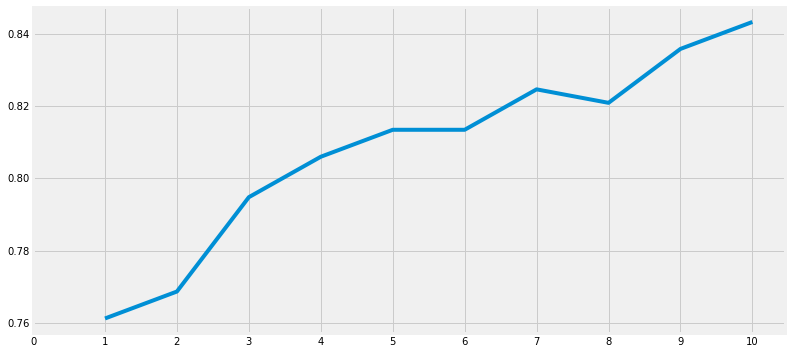

Accuracies for different values of n are:  [0.76119403 0.76865672 0.79477612 0.80597015 0.81343284 0.81343284
 0.82462687 0.82089552 0.8358209  0.84328358] with the max value as  0.8432835820895522


In [66]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are: ', a.values, 'with the max value as ', a.values.max())

### Gaussian Naive Bayes

In [67]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [68]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8171641791044776


- 모델의 정확도가 분류기의 견고성을 결정하는 유일한 요소는 아니다. 분류기가 훈련 데이터에 대해 훈련되고 테스트 데이터에 대해 테스트되었으며 정확도가 90%라고 가정해 보자
- 이제 이것은 분류자에 대해 매우 좋은 정확도인 것 같지만, 오는 모든 새로운 테스트 세트에 대해 90%가 될 것이라고 확인할 수 있을까? 대답은 아니다. 왜냐하면 분류기가 스스로 훈련하는 데 사용할 모든 인스턴스를 결정할 수 없기 때문이다. 교육 및 테스트 데이터가 변경되면 정확도도 변경된다. 증가하거나 감소할 수 있다. 이를 모델 분산이라고 한다.

## 3-2 Cross Validation

많은 경우 데이터가 불균형하다. 즉, class1 인스턴스는 많지만 다른 클래스 인스턴스는 적을 수 있다. 따라서 데이터 세트의 모든 인스턴스에서 알고리즘을 훈련하고 테스트해야 한다. 그런 다음 데이터 세트에 대해 표시된 모든 정확도의 평균을 구할 수 있다.  

1. The K-Fold Cross Validation works by first dividing the dataset into k-subsets.  
2. Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.  
3. We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.  
**This is called K-Fold Cross Validation.**  
4. An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [84]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10,shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.812634,0.041063
Decision Tree,0.805855,0.044580
Naive Bayes,0.795843,0.054861
Random Forest,0.812609,0.045596


<AxesSubplot:>

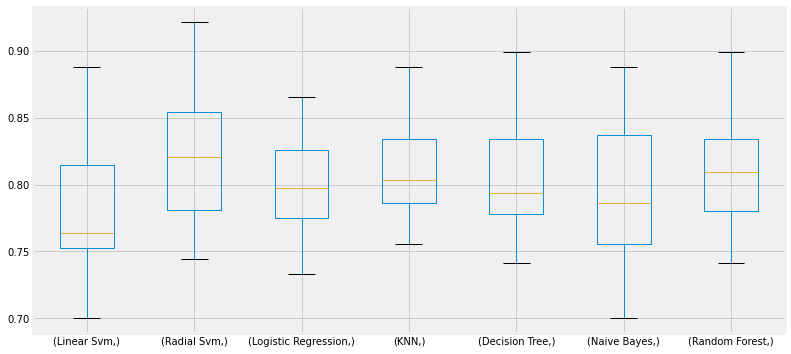

In [85]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

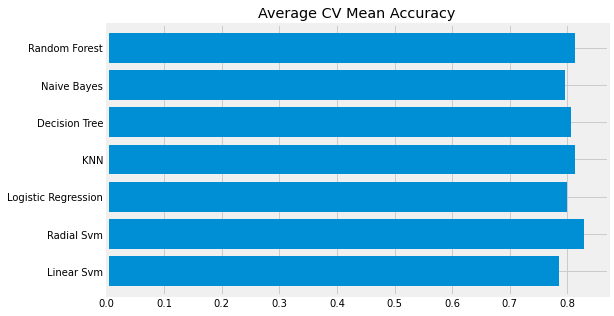

In [86]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### Confusion Matrix

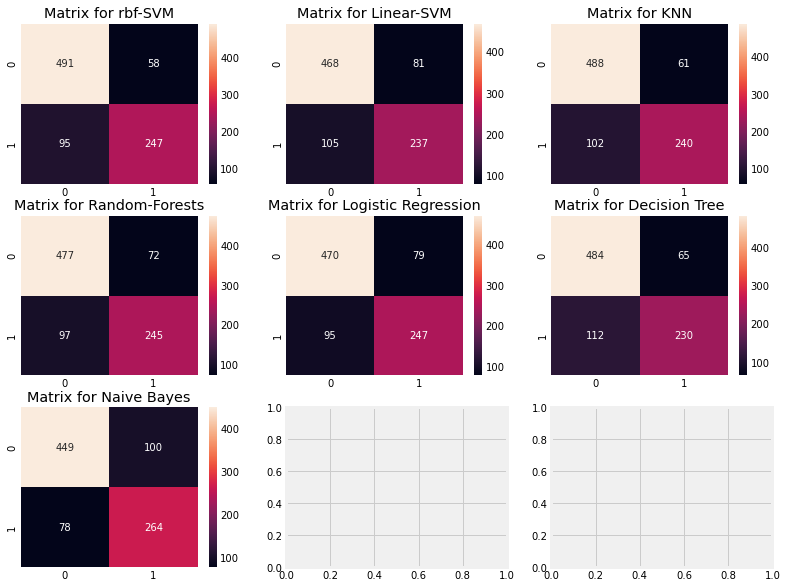

In [87]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

#### Interpreting Confusion Matrix
The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are 491(for dead) + 247(for survived) with the mean CV accuracy being (491+247)/891 = 82.8% which we did get earlier.

2)Errors--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

#### Hyper-Paramgeters Tuning
The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.  

**SVM**

In [72]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


**Random Forests**

In [73]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


## 3-3 Ensembling
Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.  

### Voting Classifier
It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

In [74]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8237952559300874


### Bagging
Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.  

**Bagged KNN**
Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbours, as small value of n_neighbours.

In [75]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8137952559300874


**Bagged DecisionTree**

In [76]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting
Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:  

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.   

**AdaBoost(Adaptive Boosting)**  
The weak learner or estimator in this case is a Decsion Tree. But we can change the dafault base_estimator to any algorithm of our choice.

In [77]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


**Stochastic Gradient Boosting**  
Here too the weak learner is a Decision Tree.

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


**XGBoost**

In [79]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


**Hyper-Parameter Tuning for AdaBoost**

In [80]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


**Confusion Matrix for the Best Model**

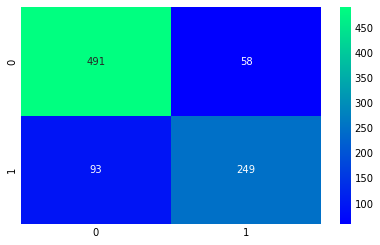

In [81]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## 3-4 Important Features Extraction

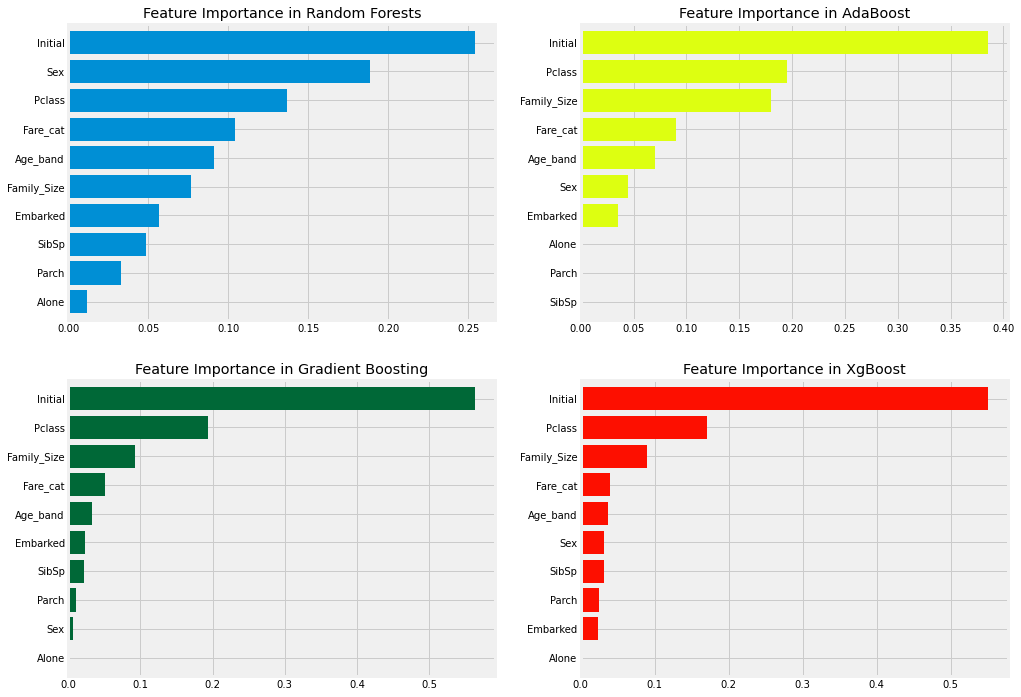

In [82]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

1. Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2. The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3.Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.